# Scraping Topito Top 10 des mangas les plus vendus

In [36]:
# Import des librairies 
import requests # Pour récupérer le code source de la page
from bs4 import BeautifulSoup # Pour scraper les données
from models.Manga import Manga # Import classe Manga
import pandas as pd
import matplotlib.pyplot as plot

In [72]:
# Récupère le code source et le sauvegarde dans une variable (request_text)
request_text = requests.get("https://www.topito.com/top-manga-vente-monde-temps")

# Instancie BeautifulSoup avec le request_text
soup = BeautifulSoup(request_text.content, "html.parser")


In [71]:
# Trouve les items et les sauvegardes dans une liste (items)
items = soup.find("div", class_="items").find_all("div", class_="item")
items

[<div class="item">
 <h2 class="item-title">1. <a href="https://www.appbubble.co/one-piece/serie/mo7s7gN92z#ae5" target="_blank">One Piece</a> (460 millions de ventes)</h2>
 <p>Notre numéro 1 à tous. Meilleur manga jamais paru. Surtout cette année avec des scans de folie, notamment le <a href="https://www.topito.com/top-meilleur-tweet-one-piece-chapitre-957">chapitre 957</a>, qui m’a terminé. One Piece c’est un bijou, et le jour où on arrivera à la fin, je ne sais pas ce que je ferai de ma vie.</p>
 <figure class="ziofix-credit"><img alt="" class="attachment-600x size-600x lazyload" data-src="https://media.topito.com/wp-content/uploads/2020/01/one-20piece-20serie-20hollywood-59722f8294597-600x330.png" data-srcset="https://media.topito.com/wp-content/uploads/2020/01/one-20piece-20serie-20hollywood-59722f8294597-600x330.png 600w, https://media.topito.com/wp-content/uploads/2020/01/one-20piece-20serie-20hollywood-59722f8294597-300x165.png 300w, https://media.topito.com/wp-content/uploads/

In [60]:
df = pd.DataFrame(columns=["name","url_img", "nb_sold"])

In [61]:
for item in items:
    if item.find("a"):
        url = item.find("img").get("data-src")
        str_nb_sold = str.split(item.find("h2").getText(),"(")
        nb_sold = int(str.split(str_nb_sold[1]," ")[0])
        name = item.find("a").getText()
        print(Manga.to_dict(url, name, nb_sold))
        df = df.append(Manga.to_dict(url_img=url, name=name, nb_sold=nb_sold), ignore_index=True)

{'name': 'https://media.topito.com/wp-content/uploads/2020/01/one-20piece-20serie-20hollywood-59722f8294597-600x330.png', 'url_img': 'One Piece', 'nb_sold': 460}
{'name': 'https://media.topito.com/wp-content/uploads/2020/01/Yamcha_Reincarnated_vs_Vegeta-3-1280x720-600x338.png', 'url_img': 'Dragon Ball', 'nb_sold': 300}
{'name': 'https://media.topito.com/wp-content/uploads/2020/01/golgo2-600x433.jpg', 'url_img': 'Golgo 13', 'nb_sold': 280}
{'name': 'https://media.topito.com/wp-content/uploads/2020/01/957959007feab1cf29807db55bc92caf.png', 'url_img': 'Naruto', 'nb_sold': 250}
{'name': 'https://media.topito.com/wp-content/uploads/2020/01/9240_t8-600x461.jpg', 'url_img': 'Détective Conan', 'nb_sold': 230}
{'name': 'https://media.topito.com/wp-content/uploads/2020/01/PlancheA_33673-600x461.jpg', 'url_img': 'Black Jack', 'nb_sold': 176}
{'name': 'https://media.topito.com/wp-content/uploads/2020/01/p1-oishinbo-a-20140520-870x635-600x438.jpg', 'url_img': 'Oishinbo', 'nb_sold': 130}
{'name': 'h

In [62]:
df.head()

,name,url_img,nb_sold
0,One Piece,https://media.topito.com/wp-content/uploads/20...,460
1,Dragon Ball,https://media.topito.com/wp-content/uploads/20...,300
2,Golgo 13,https://media.topito.com/wp-content/uploads/20...,280
3,Naruto,https://media.topito.com/wp-content/uploads/20...,250
4,Détective Conan,https://media.topito.com/wp-content/uploads/20...,230


In [69]:
df = df.sort_values(by=["nb_sold"] ,ascending=True)

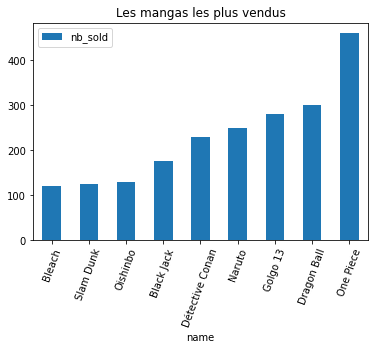

In [70]:
df.plot.bar(x="name", y="nb_sold", rot=70, title="Les mangas les plus vendus")

plot.show(block=True)